<a href="https://colab.research.google.com/github/kaz2ngt/colaboratory/blob/master/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6_1: 学習済みモデルの呼び出しの例

In [0]:
from tensorflow.python.keras.applications.vgg16 import VGG16

# 初回呼び出し時にモデルをダウンロードするため、初回呼び出し時は時間がかかる
model = VGG16()

# 6_2: VGG16のモデル読み込み

In [0]:
from tensorflow.python.keras.applications.vgg16 import VGG16

# 初回呼び出し時にモデルをダウンロードするため、初回呼び出し時は時間がかかる
model = VGG16()

# 6_3: モデルのサマリの確認

In [0]:
# モデルのサマリを確認する。入力層のサイズが224x224、出力層は1000クラス分の確率が出力される構成になっている
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# 6_4: 入力画像の確認

In [0]:
from tensorflow.python.keras.preprocessing.image import load_img

#画像をロードする。load_img()では、読み込み時に画像をリサイズすることができるので、VGG16の入力サイズ224x224にリサイズする
img_dog = load_img('dog.jpg', target_size=(224,224))
img_cat = load_img('cat.jpg', target_size=(224,224))

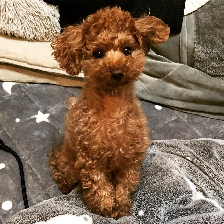

In [0]:
img_dog

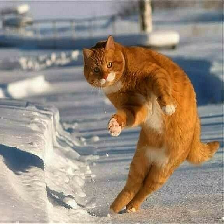

In [0]:
img_cat

# 6_5: 一般的な数値データに変換する

In [0]:
from tensorflow.python.keras.preprocessing.image import img_to_array

# load_img()はPillowと呼ばれる画像ライブラリのデータフォーマットになっているため、そのままでは利用できない
# 一般的な数値データとして扱うため、numpy.ndarrayに変換
arr_dog = img_to_array(img_dog)
arr_cat = img_to_array(img_cat)

# 6_6: VGG16に入力するための前処理を適用

In [0]:
from tensorflow.python.keras.applications.vgg16 import preprocess_input

# 画像の各チャンネルの中心化とRGBからBGRへの変換を行う。
# 画像をVGG16モデルの事前学習時と同じ状態に合わせて変換
arr_cat = preprocess_input(arr_cat)
arr_dog = preprocess_input(arr_dog)

# 6_7: 2枚の画像を1つにまとめる

In [0]:
import numpy as np

# 一般的な判別モデルは、複数の画像・データを一度に入力し、データの数だけ結果を出力できる。
# 犬と猫の画像をまとめて、2枚の画像を含む配列の入力データに変換
arr_input = np.stack([arr_dog, arr_cat])

In [0]:
# 入力データのshapeを確認
print('shape of arr_input', arr_input.shape)

shape of arr_input (2, 224, 224, 3)


# 6_8: 予測結果を算出する

In [0]:
# 予測値 (確率) を算出
# 推論では2 x 1000の2次元配列が出力される
probs = model.predict(arr_input)

# 予測値のshapeを確認
print('shape of probs:', probs.shape)

# 予測値の表示
probs

shape of probs: (2, 1000)


array([[2.3940046e-11, 6.5986527e-09, 1.0713991e-10, ..., 5.6580774e-08,
        8.4320220e-08, 2.6068005e-06],
       [3.6001143e-07, 1.4852904e-04, 3.3750496e-06, ..., 1.0459784e-06,
        4.1296422e-05, 2.0549350e-04]], dtype=float32)

# 6_9: 画像の予測結果を取得

In [0]:
from tensorflow.python.keras.applications.vgg16 import decode_predictions

# 予測結果は、1000クラスそれぞれの確率のみで返されるため、クラス名が判断しにくいため
# decode_predictions()を使ってわかりやすい結果に変換し、上位5つを表示
results = decode_predictions(probs)

40960/35363 [==================================] - 0s 0us/step


# 6_10: 犬の画像の予測結果

In [0]:
# 犬の画像の結果を表示(上位5)
results[0]

[('n02113624', 'toy_poodle', 0.68860185),
 ('n02113712', 'miniature_poodle', 0.30777273),
 ('n02113799', 'standard_poodle', 0.0024362665),
 ('n04399382', 'teddy', 0.00036163587),
 ('n04162706', 'seat_belt', 0.00012144121)]

# 6_11: 猫の画像の予測結果

In [0]:
# 猫の画像の結果を表示(上位5)
results[1]

[('n02441942', 'weasel', 0.57292217),
 ('n02115913', 'dhole', 0.14005692),
 ('n02119022', 'red_fox', 0.06401636),
 ('n02123159', 'tiger_cat', 0.046076152),
 ('n02120079', 'Arctic_fox', 0.039055683)]

# 6_12: Jupyter Notebook上でグラフを表示

In [0]:
%matplotlib inline

# 6_13: モデルのサマリを確認する

In [0]:
from tensorflow.python.keras.applications.vgg16 import VGG16

# 既存の1000クラスの出力を使わないため、
# include_top=Falseとして出力層を含まない状態でロード
vgg16 = VGG16(include_top=False, input_shape=(224, 224, 3))

# モデルのサマリを確認。出力層が含まれていないことがわかる
vgg16.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool

# 6_14: VGG16を利用したモデルの作成と学習方法の設定

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten

# モデルを編集し、ネットワークを生成する関数の定義
def  build_transfer_model(vgg16):

  # 読み出したモデルを使って、新しいモデルを作成
  model = Sequential(vgg16.layers)
  
  # 読み出した重みの一部は再学習しないように設定。
  # ここでは、追加する層と出力層に近い層の重みのみを再学習
  for layer in model.layers[:15]:
    layer.trainable = False
    
  # 追加する出力部分の層を構築
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  return model

# 定義した関数を呼び出して、ネットワークを生成
model = build_transfer_model(vgg16)

# 6_15: 最適化アルゴリズムなどを指定してモデルをコンパイルする

In [0]:
from tensorflow.python.keras.optimizers import SGD

model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(lr=1e-4, momentum=0.9),
    metrics=['accuracy']
)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

# 6_16: ジェネレータの生成

In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import preprocess_input

# 学習用画像をロードするためのジェネレータを生成。スケール変換やデータ拡張の引数を指定
idg_train = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

# 6_17: イテレータの生成

In [0]:
# 画像をロードするためのイテレータを生成

# 訓練用データ (学習時に利用)
img_itr_train = idg_train.flow_from_directory(
    'img/shrin_temple/train',
    target_size=(224, 224),
    batch_size=16,
    class_model='binary'
)

# 検証用データ (学習時に利用)
img_itr_validation = idg_train.flow_from_directory(
    'img/shrin_temple/validation',
    target_size=(224, 224),
    batch_size=16,
    class_model='binary'
)

TypeError: ignored

# 6_18: モデル保存時ディレクトリの準備

In [0]:
import os
from datetime import datetime

# モデル保存用のディレクトリの準備
model_dir = os.path.join(
    'models',
    datetime.now().strftime('%y%m%d_%H%M')
)
os.makedirs(model_dir, exist_ok=True)
print('model_dir:', model_dir)  # 保存先のディレクトリ名を表示

dir_weights = os.path.join(model_dir, 'weights')
os.makedirs(dir_weights, exist_ok=True)

model_dir: models/190528_0851


# 6_19: ネットワーク構造とクラスラベルの保存

In [0]:
import json
import pickle

# ネットワークの保存
model_json  = os.path.join(model_dir, 'model.json')
with open(model_json, 'w') as f:
  json.dump(model.to_json(), f)
  
# 学習時の正解ラベルの保存
model_classes = os.path.join(model_dir, 'classes.pkl')
with open(model_classes, 'wb') as f:
  pickle.dump(img_itr_train.class_indices, f)

NameError: ignored

# 6_20: 何ミニバッチ分学習すれば1エポックになるのかを計算する

In [0]:
import math

# 何バッチ分学習すれば1エポックかを計算 (学習時に指定する必要があるため)
batch_size = 16
steps_per_epoch = math.ceil(
    img_itr_train.samples/batch_size
)
validation_steps = math.ceil(
    img_itr_validation.samples/batch_size
)

NameError: ignored

# 6_21: Callbackを生成し設定する

In [1]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, CSVLogger

# Callbacksの設定
cp_filepath = os.path.join(dir_weights, 'ep_{epoch:02d}_ls_{loss:.1f}.h5')
cp = ModelCheckpoint(
    cp_filepath,
    monitor='loss',
    verbose=0,
    save_best_only=False,
    save_weights_only=True,
    mode='auto',
    period=5
)

csv_filepath = os.path.join(model_dir, 'loss.csv')
csv = CSVLogger(csv_filepath, append=True)

NameError: ignored

# 6_22: モデルの学習

In [2]:
n_epoch = 30

# モデルの学習
history = model.fit_generator(
    img_itr_train,
    steps_per_epoch=steps_per_eposh,
    epochs=n_epoch, # 学習するエポック数
    validation_data=img_itr_validation,
    validation_steps=validation_steps,
    callbacks = [cp, csv]
)

NameError: ignored